# Polynomial Linear Regression.

### Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Reading the excel (.csv) file

In [289]:
df = pd.read_csv("train.csv")
df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,333,61,0,31.160,0,0,1,13429.03540
1,356,46,1,27.600,0,0,3,24603.04837
2,139,54,0,31.900,3,0,2,27322.73386
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560


### Getting information about structure of data : -

In [290]:
df.info()  #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        936 non-null    int64  
 1   age       936 non-null    int64  
 2   sex       936 non-null    int64  
 3   bmi       936 non-null    float64
 4   children  936 non-null    int64  
 5   smoker    936 non-null    int64  
 6   region    936 non-null    int64  
 7   charges   936 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 58.6 KB


## Data Visualization

### Plotting every feature against every other feature to find correlation and check the pattern of data

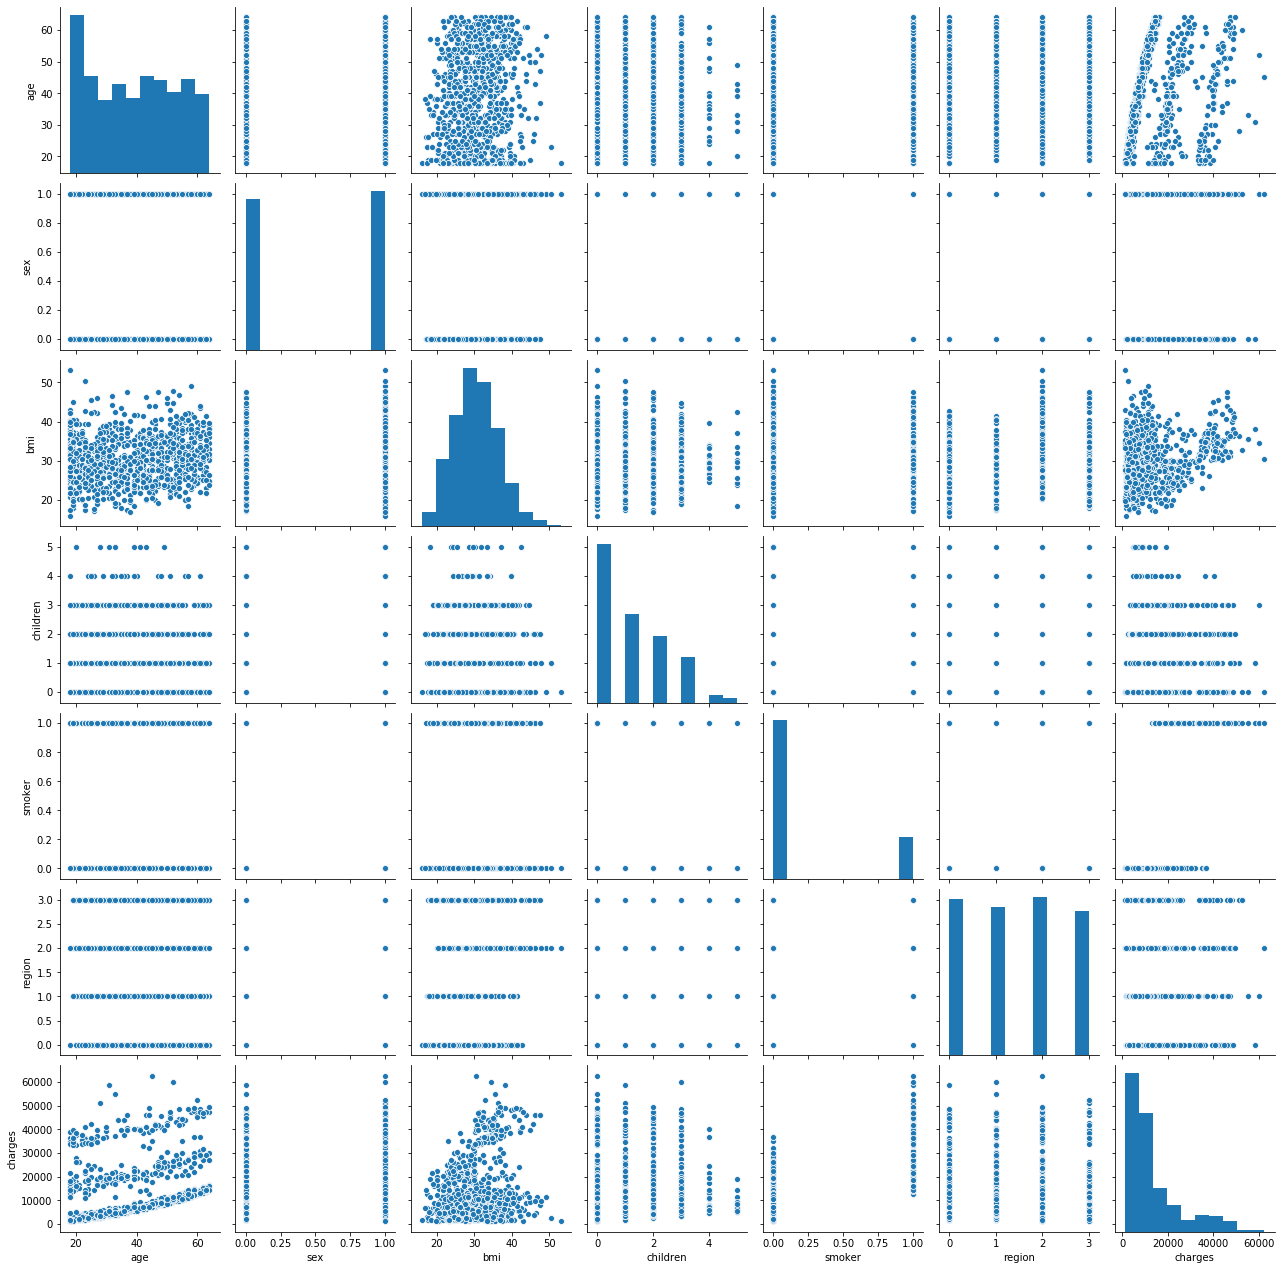

In [840]:
sns.pairplot(df)

#### We can see that for the target variable i.e. charges : 
1. Age suggests a positive correlation.
2. Charges are high for people with BMI more than 30.
3. Smokers tend to have higher charges than Non-smokers
4. If no. of children are 4 or more than 4 the charges are low
5. Sex doesn't really matter much because both (male = 1, female = 0) have almost equal charges.
6. Same goes for different regions as well

In [293]:
#Checking for children > 4
df1[df1['children']>4]

,id,age,sex,bmi,children,smoker,region,charges
15,985,20,1,30.115,5,0,0,4915.05985
73,1086,39,0,18.300,5,1,3,19023.26000
216,72,31,1,28.500,5,0,0,6799.45800
303,1246,28,1,24.300,5,0,3,5615.36900
389,569,49,0,31.900,5,0,3,11552.90400
473,938,39,0,24.225,5,0,1,8965.79575
610,1117,41,1,29.640,5,0,0,9222.40260
705,878,33,1,33.440,5,0,2,6653.78860
734,641,33,1,42.400,5,0,3,6666.24300
763,1273,43,1,25.520,5,0,2,14478.33015


##### Now we can see that a lot of people have 5 children so we can't ignore all of these but we can choose a few whose BMI is 25 or less than 25 and drop the rows.

In [294]:
df.drop([73, 303, 473, 763],inplace=True)

#### Checking the distribution of charges variable.

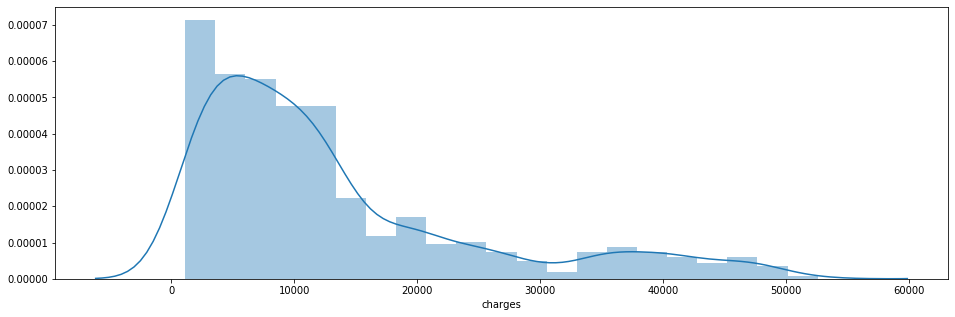

In [298]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df1.charges, ax=ax)

### Finding out outliers (extreme data points) in our data which can cause distrubance:

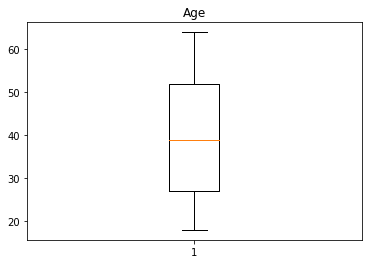

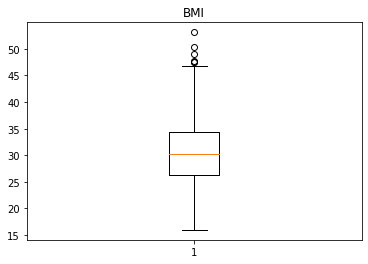

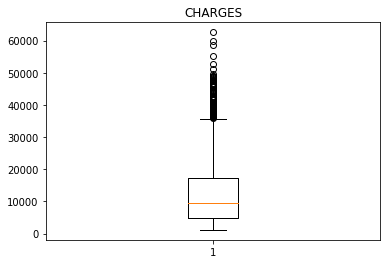

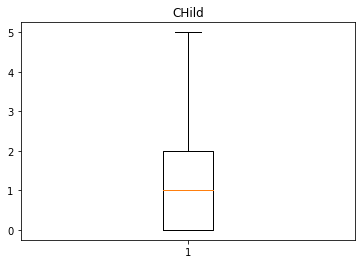

In [291]:
plt.boxplot(df['age'])
plt.title('Age')
plt.show()

plt.boxplot(df['bmi'])
plt.title('BMI')
plt.show()

plt.boxplot(df['charges'])
plt.title('CHARGES')
plt.show()

plt.boxplot(df['children'])
plt.title('CHild')
plt.show()

#### Observing the above box plots it's clear that: 
1. There are a few outliers in BMI
2. There are a lot of outliers in the target variable 'charges'.


##### We can set a threshold maybe 55,000 and above and remove the extreme values which won't affect our model much.

In [295]:
df[df['charges']>55000]

,id,age,sex,bmi,children,smoker,region,charges
437,1231,52,1,34.485,3,1,1,60021.39897
588,820,33,0,35.530,0,1,1,55135.40209
718,1301,45,1,30.360,0,1,2,62592.87309
794,578,31,0,38.095,1,1,0,58571.07448


In [297]:
df.drop([437, 588, 718, 794], inplace = True)

#### Now instead of removing outliers in BMI, since we know that peoplr with BMI over 30 tend to have higher charges we can binarize the BMI feature by setting a threshold 30. 
People with BMI<30 ==> 0
people with BMI>=30 ==> 1
#### Binarization always gives better performance over removing outliers as removing outliers is loss of data.

In [299]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=30)
df['bmi'] = binarizer.fit_transform(df[['bmi']])
df

## Here we can see that the column BMI is binarized.

,id,age,sex,bmi,children,smoker,region,charges
0,333,61,0,1.0,0,0,1,13429.03540
1,356,46,1,0.0,0,0,3,24603.04837
2,139,54,0,1.0,3,0,2,27322.73386
3,382,55,1,1.0,0,1,0,42303.69215
4,293,25,1,1.0,2,1,2,42112.23560
...,...,...,...,...,...,...,...,...
931,1096,18,0,1.0,4,0,0,4561.18850
932,1131,39,0,0.0,5,0,2,8582.30230
933,1295,58,1,0.0,0,0,0,11931.12525
934,861,37,0,1.0,2,1,3,46113.51100


#### Plotting a heatmap to get a better insight on features to be selected.

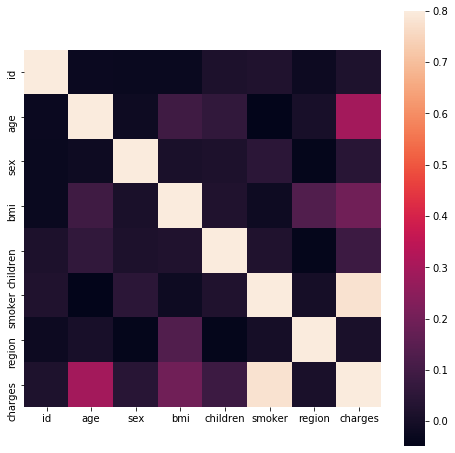

In [321]:
C_mat = df.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

### Selecting features to train our model on
We won't select sex and region as they don't contribute much in the prediction.(refer data visualization section)

In [305]:
X = df[['age', 'bmi', 'smoker','children']].values
y = df['charges'].values

### Fitting a simple linear regression model

In [306]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
predictions = lm.predict(X)

##### Using r_2 score as a metric to evaluate our model's performance

In [310]:
print("The accuracy of the model is: ",end="")
print(round(r2_score(y, predictions)*100,2), "%")

The accuracy of the model is: 75.14 %


##### Our model does well but not good enough :(

### Polynomial Regression

In [312]:
from sklearn.preprocessing import PolynomialFeatures

##### We have imported the library from sklearn and since we have selected 4 features we will try to fit a cubic polynomial i.e. polynomical with degree 3

In [313]:
poly = PolynomialFeatures(degree = 3)
Xpoly = poly.fit_transform(X)
poly.fit(Xpoly,y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [314]:
lm2 = LinearRegression()
lm2.fit(Xpoly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### After training our model, let's predict and evaluate.

In [317]:
y_poly_pred = lm2.predict(Xpoly)

In [319]:
print("The accuracy of the model is: ",end="")
print(round(r2_score(y, y_poly_pred)*100,2),"%")

The accuracy of the model is: 86.34 %


### Our model's performance has improved and is doing great now.